In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
training_set = pd.read_csv('train.csv')

In [3]:
training_set.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [4]:
#смотрим,где больше всего отсутствуют данны,если данные отсутствуют(NaN),то True
training_set.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


<AxesSubplot:>

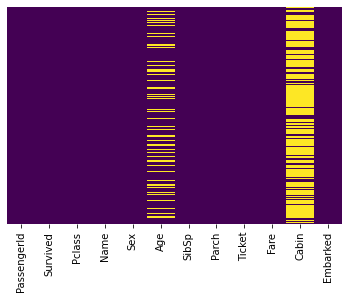

In [5]:
#черта соответстует True,где данные отсутствуют
sns.heatmap(training_set.isnull(),yticklabels=False, cbar=False, cmap='viridis')

In [6]:
sns.set_style('darkgrid')

<AxesSubplot:xlabel='Survived', ylabel='count'>

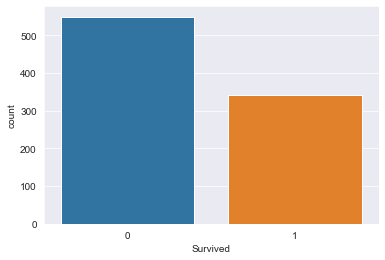

In [7]:
#например соотношение выжившых и невыжившых
sns.countplot(x='Survived',data=training_set)

<AxesSubplot:xlabel='Survived', ylabel='count'>

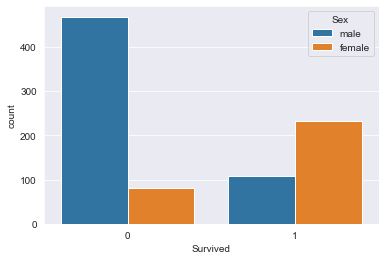

In [8]:
sns.countplot(x='Survived',data=training_set,hue='Sex')

<AxesSubplot:xlabel='Survived', ylabel='count'>

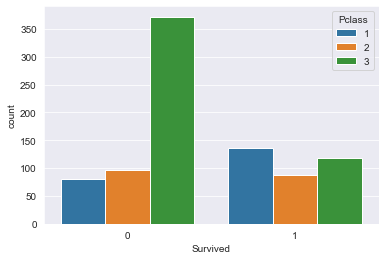

In [9]:
#выжившие от класса пассажиров
sns.countplot(x='Survived',data=training_set,hue='Pclass')

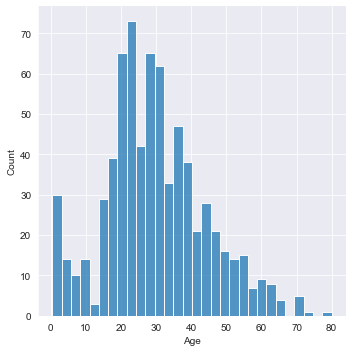

In [10]:
#возраст график распределения
sns.displot(training_set['Age'].dropna(),kde=False, bins=30)

<AxesSubplot:ylabel='Frequency'>

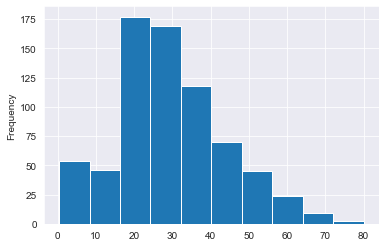

In [11]:
#визуализация,гистограмма возраста
training_set['Age'].plot.hist()

<AxesSubplot:xlabel='SibSp', ylabel='count'>

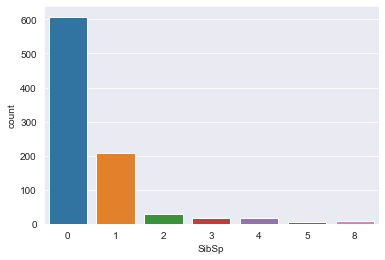

In [12]:
#сестры братья и супруги
sns.countplot(x='SibSp',data=training_set)

In [13]:
#стоимость билетов на титанике
training_set['Fare']

0       7.2500
1      71.2833
2       7.9250
3      53.1000
4       8.0500
        ...   
886    13.0000
887    30.0000
888    23.4500
889    30.0000
890     7.7500
Name: Fare, Length: 891, dtype: float64

<AxesSubplot:>

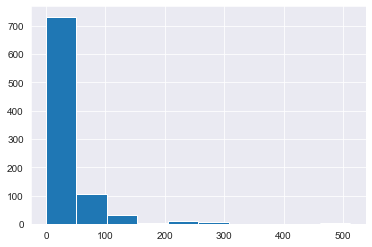

In [14]:
training_set['Fare'].hist()

<AxesSubplot:>

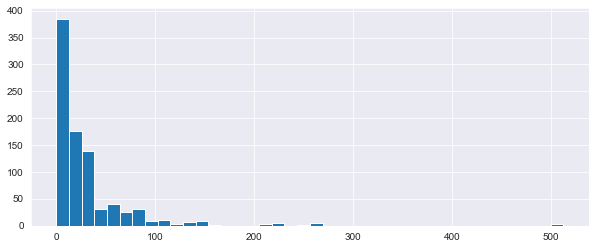

In [15]:
#видим,что основная масса билетов стоила 10$
training_set['Fare'].hist(bins=40,figsize=(10,4))

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

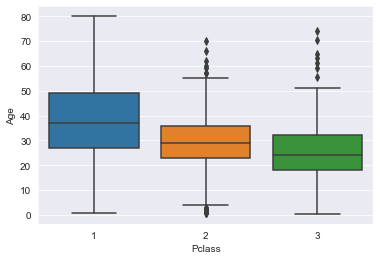

In [16]:
#РАБОТА С ОТСУТСТВУЮЩИМИ ДАННЫМИ.Отсутствующие данные в возрасте заменим средним значением(вычислим для каждого из 3-х классов путешественников свой)
sns.boxplot(x='Pclass',y='Age',data=training_set)

In [17]:
#создаем функцию для ввода данных,где они отсутствуют
def input_age(columns):
    Age = columns[0]
    Pclass = columns[1]

    if pd.isnull(Age):
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else:
            return 24
    else:
        return Age


In [18]:
training_set['Age'] = training_set[['Age','Pclass']].apply(input_age,axis=1)

<AxesSubplot:>

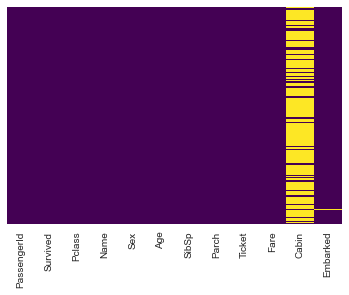

In [19]:
sns.heatmap(training_set.isnull(),yticklabels=False, cbar=False, cmap='viridis')

In [20]:
#отбрасываем ненужный столбец
training_set.drop('Cabin',axis=1,inplace = True)

In [21]:
training_set.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [22]:
#избавляемся от неизвестных значений в других столбцах(Embarked),удаляем строки с отсутствующими значениями

training_set.dropna(inplace=True)

<AxesSubplot:>

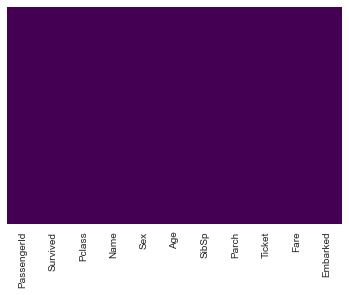

In [23]:
sns.heatmap(training_set.isnull(),yticklabels=False, cbar=False, cmap='viridis')

In [24]:
#алгоритм машинного обучения не может принимать строковые значения,например пол(М Ж) изменяем на 0 и 1
#coздаем так называемые фиктивные переменные
pd.get_dummies(training_set['Sex'])
#этот метод конвертирует категорийные переменные в фиктивные (dumnies)

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1
...,...,...
886,0,1
887,1,0
888,1,0
889,0,1


#Cталкиваемся с проблемой машинного обучения,что один столбец идеально предсказывает другой(мультиколинеарность),если один True,то другой однозначно False

In [25]:
#выбрасываем один столбец
pd.get_dummies(training_set['Sex'],drop_first= True)

,male
0,1
1,0
2,0
3,0
4,1
...,...
886,1
887,0
888,0
889,1


In [26]:
sex = pd.get_dummies(training_set['Sex'],drop_first= True)

In [27]:
sex.head()

,male
0,1
1,0
2,0
3,0
4,1


In [28]:
# тоже самое для столбца embark
embark = pd.get_dummies(training_set['Embarked'],drop_first= True)

In [29]:
embark.head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [30]:
training_set = pd.concat([training_set,sex,embark],axis=1)

In [31]:
training_set.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,0,1


Удаляем ненужные столбцы

In [32]:
training_set.drop(['Sex','Embarked','Name','Ticket','PassengerId'],axis=1, inplace=True)

In [33]:
training_set.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


Данные очищены,можно работать с моделью

In [34]:

#будем предсказывать сколько человек выживет
X = training_set.drop('Survived',axis=1)#отбросили столбецбкоторый будем предсказывать
y = training_set['Survived']


In [35]:
from sklearn.model_selection import train_test_split


In [36]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.4,random_state=333)

In [37]:
from sklearn.linear_model import LogisticRegression


In [38]:
lrm =LogisticRegression()

In [39]:
#нужно натренировать модель,fit подгонка

In [40]:
lrm.fit(X_train,y_train)

/home/henadzi/ml/venv/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [41]:
#прогноз
predictions = lrm.predict(X_test)

In [42]:
#оценка производительности
from sklearn.metrics import classification_report

In [43]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.79      0.86      0.82       217
           1       0.74      0.64      0.69       139

    accuracy                           0.77       356
   macro avg       0.76      0.75      0.75       356
weighted avg       0.77      0.77      0.77       356



In [44]:
from sklearn.metrics import confusion_matrix
#матрица ошибок
confusion_matrix(y_test,predictions)

array([[186,  31],
       [ 50,  89]])